
## Approach

I split the original training data into 80% training and 20% validation. This helps to see weather we're over-fitting on the training data and weather we should lower the learning rate and train for more epochs if validation accuracy is higher than training accuracy or stop over-training if training accuracy shift higher than the validation.

To be consistent here, all the models are initially trained for 10 epochs and another 10 epochs with a lower learning late. After the initial 20 epochs, I added data augmentation, which generates new training samples by rotating, shifting and zooming on the training samples, and trained for another 50 epochs.

## Observations
All the models achieved a higher accuracy after using data augmentation. Almost always use data augmentation!!

VGG Like Model With Batchnorm performed the best and achieved a accuarcy of 94% using data augmentation.

# Required Libaries

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
np.random.seed(12345)
%matplotlib inline

Using TensorFlow backend.


[](http://)#  Load Fashion-MNIST

In [2]:
batch_size = 512
train_data = np.array(pd.read_csv('fashion-mnist_train.csv'))
test_data = np.array(pd.read_csv('fashion-mnist_test.csv'))

In [3]:
test_data.shape

(10000, 785)

In [4]:
train_data[:, 0]

array([2, 9, 6, ..., 8, 8, 7])

In [5]:
X_train_orig = train_data[:, 1:785]
y_train_orig = train_data[:, 0]
X_test = train_data[:, 1:785]
y_test = train_data[:, 0]

In [6]:
X_train_orig = X_train_orig.astype('float32')
X_test = X_test.astype('float32')
X_train_orig /= 255
X_test /= 255

In [7]:
print(X_train_orig.shape)
print(y_train_orig.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(60000, 784)
(60000,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train_orig, y_train_orig, test_size=0.2, random_state=12345)

In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


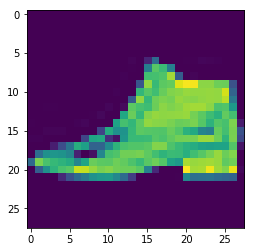

In [10]:
plt.imshow(X_train[2, :].reshape((28, 28)))

# 2 Layer Neural Network

In [11]:
model = Sequential([
    Dense(512, input_shape=(784,), activation='relu'),
    Dense(128, activation = 'relu'),
    Dense(10, activation='softmax')
])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s - loss: 0.6253 - acc: 0.7859 - val_loss: 0.4427 - val_acc: 0.84970.78
Epoch 2/20
48000/48000 [==============================] - 2s - loss: 0.4236 - acc: 0.8499 - val_loss: 0.3982 - val_acc: 0.8614
Epoch 3/20
48000/48000 [==============================] - 2s - loss: 0.3747 - acc: 0.8681 - val_loss: 0.3593 - val_acc: 0.8753
Epoch 4/20
48000/48000 [==============================] - 2s - loss: 0.3453 - acc: 0.8766 - val_loss: 0.3361 - val_acc: 0.8826
Epoch 5/20
48000/48000 [==============================] - 2s - loss: 0.3187 - acc: 0.8865 - val_loss: 0.3211 - val_acc: 0.8849
Epoch 6/20
48000/48000 [==============================] - 2s - loss: 0.3001 - acc: 0.8911 - val_loss: 0.3487 - val_acc: 0.8717
Epoch 7/20
48000/48000 [==============================] - 2s - loss: 0.2910 - acc: 0.8943 - val_loss: 0.3031 - val_acc: 0.8902
Epoch 8/20
48000/48000 [==============================] -

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.194042544499
Test accuracy: 0.93


# CNN with 1 Convolutional Layer

In [16]:
img_rows = 28
img_cols = 28
input_shape = (img_rows, img_cols, 1)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

In [17]:
cnn1 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
cnn1.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [19]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 24s - loss: 0.6403 - acc: 0.7832 - val_loss: 0.4257 - val_acc: 0.8524
Epoch 2/10
48000/48000 [==============================] - 22s - loss: 0.4051 - acc: 0.8562 - val_loss: 0.3548 - val_acc: 0.8781
Epoch 3/10
48000/48000 [==============================] - 21s - loss: 0.3489 - acc: 0.8765 - val_loss: 0.3351 - val_acc: 0.8819. - ETA: 7s - los - ETA: 2s - loss: 0.3486 - 
Epoch 4/10
48000/48000 [==============================] - 19s - loss: 0.3212 - acc: 0.8860 - val_loss: 0.3033 - val_acc: 0.89410.87 - ETA: 17s  - ETA: 14s - loss: 0.33
Epoch 5/10
48000/48000 [==============================] - 19s - loss: 0.3016 - acc: 0.8935 - val_loss: 0.3029 - val_acc: 0.8944
Epoch 6/10
48000/48000 [==============================] - 19s - loss: 0.2840 - acc: 0.8991 - val_loss: 0.2918 - val_acc: 0.8967 acc:  - ETA: 10s  - ETA: 4s - loss: 0.2852 - acc: 0.8 - ETA: 4s - loss:
Epoch 7/10
48000/48000 [=

In [20]:
cnn1.optimizer.lr = 0.0001

In [21]:
cnn1.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 18s - loss: 0.2350 - acc: 0.9150 - val_loss: 0.2479 - val_acc: 0.9110
Epoch 2/10
48000/48000 [==============================] - 18s - loss: 0.2259 - acc: 0.9171 - val_loss: 0.2589 - val_acc: 0.9083
Epoch 3/10
48000/48000 [==============================] - 18s - loss: 0.2183 - acc: 0.9203 - val_loss: 0.2524 - val_acc: 0.9107.
Epoch 4/10
48000/48000 [==============================] - 18s - loss: 0.2082 - acc: 0.9250 - val_loss: 0.2377 - val_acc: 0.9154
Epoch 5/10
48000/48000 [==============================] - 18s - loss: 0.2027 - acc: 0.9266 - val_loss: 0.2487 - val_acc: 0.9082
Epoch 6/10
48000/48000 [==============================] - 19s - loss: 0.1954 - acc: 0.9300 - val_loss: 0.2440 - val_acc: 0.9143
Epoch 7/10
48000/48000 [==============================] - 19s - loss: 0.1920 - acc: 0.9311 - val_loss: 0.2381 - val_acc: 0.9155
Epoch 8/10
48000/48000 [=============================

In [22]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.166777265798
Test accuracy: 0.941816666667


### Data Augmentation

In [23]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                               height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(X_train, y_train, batch_size=batch_size)
val_batches = gen.flow(X_val, y_val, batch_size=batch_size)

In [24]:
cnn1.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False)

Epoch 1/50
93/93 [==============================] - 24s - loss: 0.5402 - acc: 0.7990 - val_loss: 0.4564 - val_acc: 0.8304
Epoch 2/50
93/93 [==============================] - 23s - loss: 0.4525 - acc: 0.8306 - val_loss: 0.4265 - val_acc: 0.8398
Epoch 3/50
93/93 [==============================] - 22s - loss: 0.4361 - acc: 0.8371 - val_loss: 0.3999 - val_acc: 0.8513.837
Epoch 4/50
93/93 [==============================] - 23s - loss: 0.4162 - acc: 0.8438 - val_loss: 0.4104 - val_acc: 0.8458
Epoch 5/50
93/93 [==============================] - 23s - loss: 0.4011 - acc: 0.8491 - val_loss: 0.3993 - val_acc: 0.8483
Epoch 6/50
93/93 [==============================] - 22s - loss: 0.3942 - acc: 0.8523 - val_loss: 0.3888 - val_acc: 0.8527 ETA: 3s - loss: 0.3
Epoch 7/50
93/93 [==============================] - 23s - loss: 0.3861 - acc: 0.8550 - val_loss: 0.3716 - val_acc: 0.8619
Epoch 8/50
93/93 [==============================] - 22s - loss: 0.3804 - acc: 0.8577 - val_loss: 0.3575 - val_acc: 0.8685


In [25]:
score = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.196491678878
Test accuracy: 0.927666666667


# CNN with 3 Convolutional Layers

In [26]:
cnn2 = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),

    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [ ]:
cnn2.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 48s - loss: 0.9643 - acc: 0.6429 - val_loss: 0.5694 - val_acc: 0.7856
Epoch 2/10
48000/48000 [==============================] - 63s - loss: 0.5698 - acc: 0.7838 - val_loss: 0.4655 - val_acc: 0.8258
Epoch 3/10
48000/48000 [==============================] - 61s - loss: 0.4911 - acc: 0.8180 - val_loss: 0.4148 - val_acc: 0.8482
Epoch 4/10
48000/48000 [==============================] - 50s - loss: 0.4378 - acc: 0.8374 - val_loss: 0.3789 - val_acc: 0.8592
Epoch 5/10
48000/48000 [==============================] - 45s - loss: 0.4060 - acc: 0.8514 - val_loss: 0.3448 - val_acc: 0.8736
Epoch 6/10
48000/48000 [==============================] - 51s - loss: 0.3783 - acc: 0.8627 - val_loss: 0.3271 - val_acc: 0.8813
Epoch 7/10
48000/48000 [==============================] - 44s - loss: 0.3592 - acc: 0.8679 - val_loss: 0.3073 - val_acc: 0.8873
Epoch 8/10
48000/48000 [==============================

In [ ]:
cnn2.optimizer.lr = 0.0001

In [ ]:
cnn2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 46s - loss: 0.3070 - acc: 0.8878 - val_loss: 0.2655 - val_acc: 0.9018
Epoch 2/10
48000/48000 [==============================] - 41s - loss: 0.2966 - acc: 0.8924 - val_loss: 0.2612 - val_acc: 0.9047
Epoch 3/10
48000/48000 [==============================] - 50s - loss: 0.2905 - acc: 0.8933 - val_loss: 0.2624 - val_acc: 0.9024
Epoch 4/10
48000/48000 [==============================] - 45s - loss: 0.2799 - acc: 0.8981 - val_loss: 0.2619 - val_acc: 0.9015
Epoch 5/10
48000/48000 [==============================] - 41s - loss: 0.2720 - acc: 0.9000 - val_loss: 0.2456 - val_acc: 0.9073
Epoch 6/10
48000/48000 [==============================] - 41s - loss: 0.2636 - acc: 0.9037 - val_loss: 0.2433 - val_acc: 0.9094
Epoch 7/10
48000/48000 [==============================] - 39s - loss: 0.2594 - acc: 0.9053 - val_loss: 0.2377 - val_acc: 0.9119
Epoch 8/10
48000/48000 [==============================

In [ ]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.199658347356
Test accuracy: 0.92745


### Data Augmentation

In [ ]:
cnn2.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False)

Epoch 1/50
93/93 [==============================] - 45s - loss: 0.4715 - acc: 0.8230 - val_loss: 0.3830 - val_acc: 0.8561
Epoch 2/50
93/93 [==============================] - 44s - loss: 0.4257 - acc: 0.8395 - val_loss: 0.3579 - val_acc: 0.8644
Epoch 3/50
93/93 [==============================] - 47s - loss: 0.4010 - acc: 0.8486 - val_loss: 0.3463 - val_acc: 0.8703
Epoch 4/50
93/93 [==============================] - 42s - loss: 0.4007 - acc: 0.8502 - val_loss: 0.3408 - val_acc: 0.8721
Epoch 5/50
93/93 [==============================] - 43s - loss: 0.3853 - acc: 0.8556 - val_loss: 0.3333 - val_acc: 0.8758
Epoch 6/50
93/93 [==============================] - 44s - loss: 0.3786 - acc: 0.8592 - val_loss: 0.3399 - val_acc: 0.8708
Epoch 7/50
93/93 [==============================] - 45s - loss: 0.3761 - acc: 0.8595 - val_loss: 0.3140 - val_acc: 0.8826
Epoch 8/50
93/93 [==============================] - 43s - loss: 0.3677 - acc: 0.8625 - val_loss: 0.3297 - val_acc: 0.8747
Epoch 9/50
93/93 [======

In [ ]:
score = cnn2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# CNN with 4 Convolutional Layers and Batch Normalization

In [ ]:
mean_px = X_train.mean().astype(np.float32)
std_px = X_train.std().astype(np.float32)
def norm_input(x): return (x-mean_px)/std_px

In [ ]:
cnn3 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    BatchNormalization(),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
cnn3.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
cnn3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
cnn3.optimizer.lr = 0.0001

In [ ]:
cnn3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
score = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Data Augmentation

In [ ]:
cnn3.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False)

In [ ]:
score = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# VGG Like Model

In [ ]:
cnn4 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),    
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),    
    MaxPooling2D(pool_size=(2, 2)),
    
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
cnn4.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
cnn4.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
cnn4.optimizer.lr = 0.0001

In [ ]:
cnn4.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
score = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Data Augmentation

In [ ]:
cnn4.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False)

In [ ]:
score = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# VGG Like Model With Batchnorm

In [ ]:
cnn5 = Sequential([
    Lambda(norm_input, input_shape=(28,28, 1)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),    
    BatchNormalization(),
    Dropout(0.25),
    
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [ ]:
cnn5.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
cnn5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
cnn5.optimizer.lr = 0.0001

In [ ]:
cnn5.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          verbose=1,
          validation_data=(X_val, y_val))

In [ ]:
score = cnn5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

### Data Augmentation

In [ ]:
cnn5.fit_generator(batches, steps_per_epoch=48000//batch_size, epochs=50, 
                    validation_data=val_batches, validation_steps=12000//batch_size, use_multiprocessing=False)

In [ ]:
score = cnn5.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])